# Dimensionality Reduction

In [3]:
# System
import sys
import os
# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"
# Numerical Manipulation
import numpy as np
# Data Manipualtion
import pandas as pd
# Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### PCA

In [4]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### Principal Components

In [5]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [6]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [7]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

### Projecting Down to d Dimensions

In [8]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [9]:
X2D_using_svd = X2D

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

### Explained Variance Ratio

In [12]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [20]:
# axes = [-11.5, 14, -2, 23, -12, 15]

# fig = plt.figure(figsize=(6, 5))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
# ax.view_init(10, -70)
# ax.set_xlabel("$x_1$", fontsize=18)
# ax.set_ylabel("$x_2$", fontsize=18)
# ax.set_zlabel("$x_3$", fontsize=18)
# ax.set_xlim(axes[0:2])
# ax.set_ylim(axes[2:4])
# ax.set_zlim(axes[4:6])

# plt.show()

In [19]:
# plt.figure(figsize=(11, 4))

# plt.subplot(121)
# plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
# plt.axis(axes[:4])
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$x_2$", fontsize=18, rotation=0)
# plt.grid(True)

# plt.subplot(122)
# plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
# plt.axis([4, 15, axes[2], axes[3]])
# plt.xlabel("$z_1$", fontsize=18)
# plt.grid(True)

# plt.show()

### Choosing thr Right Numer of Dimensions

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)

In [16]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [18]:
d

154

In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [23]:
pca.n_components_

154

In [24]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557436

### PCA for Compression

In [25]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Randomized PCA

In [26]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [27]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [28]:
# filename = "my_mnist.data"
# m, n = X_train.shape

# X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
# X_mm[:] = X_train

In [29]:
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

### Kernel PCA

In [40]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [41]:
# X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [42]:
# from sklearn.decomposition import KernelPCA

# lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
# rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
# sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

# y = t > 6.9

# plt.figure(figsize=(11, 4))
# for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
#     X_reduced = pca.fit_transform(X)
#     if subplot == 132:
#         X_reduced_rbf = X_reduced
    
#     plt.subplot(subplot)
#     #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
#     #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
#     plt.title(title, fontsize=14)
#     plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
#     plt.xlabel("$z_1$", fontsize=18)
#     if subplot == 131:
#         plt.ylabel("$z_2$", fontsize=18, rotation=0)
#     plt.grid(True)

# plt.show()

In [43]:
# plt.figure(figsize=(6, 5))

# X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

# ax = plt.subplot(111, projection='3d')
# ax.view_init(10, -70)
# ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
# ax.set_xlabel("")
# ax.set_ylabel("")
# ax.set_zlabel("")
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_zticklabels([])

# plt.show()

In [44]:
# X_reduced = rbf_pca.fit_transform(X)

# plt.figure(figsize=(11, 4))
# plt.subplot(132)
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
# plt.xlabel("$z_1$", fontsize=18)
# plt.ylabel("$z_2$", fontsize=18, rotation=0)
# plt.grid(True)

### Selecting a Kernel & Tuning Hyperparameters

In [45]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# clf = Pipeline([
#         ("kpca", KernelPCA(n_components=2)),
#         ("log_reg", LogisticRegression(solver="lbfgs"))
#     ])

# param_grid = [{
#         "kpca__gamma": np.linspace(0.03, 0.05, 10),
#         "kpca__kernel": ["rbf", "sigmoid"]
#     }]

# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X, y)

In [46]:
# print(grid_search.best_params_)

In [47]:
# rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
#                     fit_inverse_transform=True)
# X_reduced = rbf_pca.fit_transform(X)
# X_preimage = rbf_pca.inverse_transform(X_reduced)

In [48]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(X, X_preimage)

### LLE

In [49]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

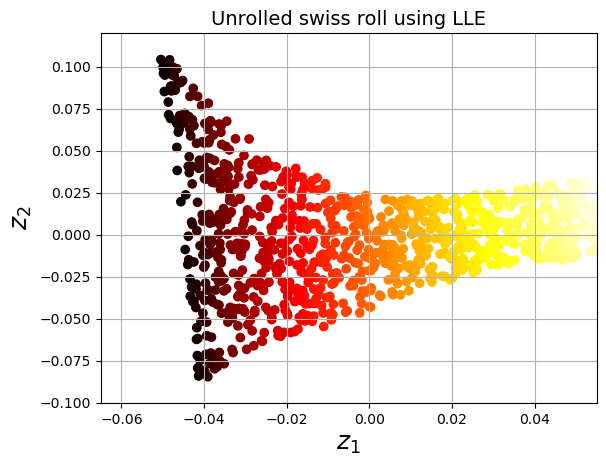

In [51]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()